In [37]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from helpers import *
from plots import *
import datetime
import pandas as pd
from proj1_helpers import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [40]:
from proj1_helpers import *
DATA_TRAIN_PATH = 'train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH, sub_sample=True)

In [3]:
tX.shape, y.shape

((5000, 30), (5000,))

In [41]:
y=y.reshape(len(y),1)
y.shape

(5000, 1)

In [5]:
tX.shape

array([[ 138.47 ,   51.655,   97.827, ...,    1.24 ,   -2.475,  113.497],
       [ 160.937,   68.768,  103.235, ..., -999.   , -999.   ,   46.226],
       [-999.   ,  162.172,  125.953, ..., -999.   , -999.   ,   44.251],
       ..., 
       [ 105.457,   60.526,   75.839, ..., -999.   , -999.   ,   41.992],
       [  94.951,   19.362,   68.812, ..., -999.   , -999.   ,    0.   ],
       [-999.   ,   72.756,   70.831, ..., -999.   , -999.   ,    0.   ]])

In [41]:
df= pd.read_csv(DATA_TRAIN_PATH)

In the following code section, we choose how do we deal with the datas. This part is extremly important since the method we choose is going to change the predictions. We have roughly two methods to deal with outliers, we tried both and we are going to compare them.

The method function returns the matrix we are going to work with. If argument 1 is chosen, we will use the first method and with argument 2 the second method.

### First method
We remove all columns containing -999. using remove_outlier_columns function.

In [42]:
new_tX, new_mean, new_std = method(1,tX)
new_tX.shape

(5000, 20)

### Second method
We transform all the -999. values by the mean of the columns (calculated without counting the -999.)

In [43]:
mean_tX, mean_mean, mean__std = method(2,tX)
mean_tX

array([[  1.00000000e+00,   3.07797572e-01,   3.96543618e-02, ...,
          1.13700709e+00,  -2.39839608e+00,   3.98182143e-01],
       [  1.00000000e+00,   1.78768046e+00,   6.33440608e-01, ...,
         -1.02859606e-16,   4.80781369e-16,  -2.31796107e-01],
       [  1.00000000e+00,  -5.67586021e-01,  -6.41518864e-01, ...,
         -1.02859606e-16,   4.80781369e-16,  -1.08298366e-01],
       ..., 
       [  1.00000000e+00,   3.78993993e-01,  -1.22366112e+00, ...,
         -1.02859606e-16,   4.80781369e-16,   2.34160770e-01],
       [  1.00000000e+00,  -7.99685985e-01,  -1.12174093e-01, ...,
         -1.02859606e-16,   4.80781369e-16,  -4.11062512e-01],
       [  1.00000000e+00,   1.53027534e-01,  -1.31829705e+00, ...,
         -1.02859606e-16,   4.80781369e-16,  -2.25396588e-01]])

For each method 1 and 2, we will implement the 6 ML methods asked in the step 2 of the project description and will compare them.

### Third method
NOT REALLY A METHOD

In [20]:
dup_tX, dup_mean, dup_std= method(3, tX)

# Linear regression
### with gradient descent method

We define the parameters of the algorithm

In [45]:
max_iters = 501
gamma = 0.04
initial_w1 = np.zeros((new_tX.shape[1], 1))
initial_w2 = np.zeros((mean_tX.shape[1], 1))

Method 1: We remove outliers

In [47]:
start_time = datetime.datetime.now()
best_ws1= least_square_GD(y, new_tX, initial_w1, gamma,max_iters)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/500): loss=0.5
Gradient Descent(100/500): loss=0.34664069018483407
Gradient Descent(200/500): loss=0.3420824627689666
Gradient Descent(300/500): loss=0.34050984134672735
Gradient Descent(400/500): loss=0.33992347569151465
Gradient Descent(500/500): loss=0.33969186313755456
Gradient Descent(500/500): loss=0.33969186313755456
Gradient Descent: execution time=0.118 seconds


Method 2: We change outliers with mean values

In [25]:
start_time = datetime.datetime.now()
best_ws2 = least_square_GD(y, mean_tX, initial_w2, gamma,max_iters)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/500): loss=0.5
Gradient Descent(100/500): loss=0.3338048617023286
Gradient Descent(200/500): loss=0.32988750586239085
Gradient Descent(300/500): loss=0.3285278951623448
Gradient Descent(400/500): loss=0.3279773616673182
Gradient Descent(500/500): loss=0.32773906243490547
Gradient Descent(500/500): loss=0.32773906243490547
Gradient Descent: execution time=0.139 seconds


********************************
gamma = 0.0001
Gradient Descent(0/500): loss=0.5
0.472245388411
Gradient Descent(0/500): loss=0.5
Gradient Descent(0/500): loss=0.5
[[ -1.67519766e-02]
 [ -1.59144751e-02]
 [ -1.15579856e-03]
 [  9.05122265e-03]
 [ -9.91640692e-05]
 [ -6.62015700e-04]
 [  7.11828044e-03]
 [ -8.14714472e-03]
 [  1.32524530e-02]
 [  1.08453024e-02]
 [  9.31979065e-04]
 [ -6.52961322e-04]
 [ -9.59912575e-04]
 [  1.52536302e-03]
 [  9.19723137e-04]
 [  1.20628685e-03]
 [  6.10990122e-04]
 [  6.01373156e-03]
 [  6.89387283e-03]
 [  6.23700385e-03]]
********************************
********************************
gamma = 0.000150989716062
Gradient Descent(0/500): loss=0.5
0.461027127212
Gradient Descent(0/500): loss=0.5
Gradient Descent(0/500): loss=0.5
[[-0.02497668]
 [-0.02340521]
 [-0.00166424]
 [ 0.01287531]
 [ 0.00025028]
 [-0.00128259]
 [ 0.00997267]
 [-0.01195202]
 [ 0.01930253]
 [ 0.01577494]
 [ 0.00138024]
 [-0.00096435]
 [-0.00144229]
 [ 0.00224701]
 [ 0.00135566]


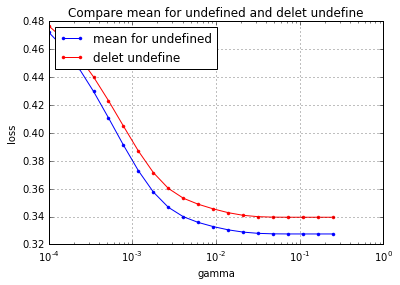

In [68]:
gammas = np.logspace(-4,-0.6,20)
mean_if_undef = []
del_if_undef = []
for gamma in gammas:
    lossU2M = compute_loss_mse(y,mean_tX, least_square_GD(y, mean_tX, initial_w2, gamma,max_iters)
    mean_if_undef.append(lossU2M)
    lossUD = compute_loss_mse(y,new_tX, least_square_GD(y, new_tX, initial_w1, gamma,max_iters))
    
    del_if_undef.append(lossUD)
undefinded_remplacement_visualization(gammas,mean_if_undef,"mean for undefined",del_if_undef,"delet undefine")

### with stochastique gradient descent

In [71]:
# Define the parameters of the algorithm.
max_iters = 21
batch_size=1
initial_w1 = np.zeros((new_tX.shape[1], 1))
initial_w2 = np.zeros((mean_tX.shape[1], 1))

# For the moment we use this gamma
gamma = 0.0004



Method 1

In [64]:
# Start SGD.
start_time = datetime.datetime.now()
sgd_w  = least_square_SGD(y, new_tX, batch_size, initial_w1, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/20): loss=0.3535142666213228
Gradient Descent(10/20): loss=0.34023996639823273
Gradient Descent(20/20): loss=0.34031509649490976
SGD: execution time=12.530 seconds


Method 2

In [65]:
# Start SGD.
start_time = datetime.datetime.now()
sgd_w  = least_square_SGD(y, mean_tX, batch_size, initial_w2, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/20): loss=0.34021643318913264
Gradient Descent(10/20): loss=0.32851879948084595
Gradient Descent(20/20): loss=0.3288403940775238
SGD: execution time=13.672 seconds


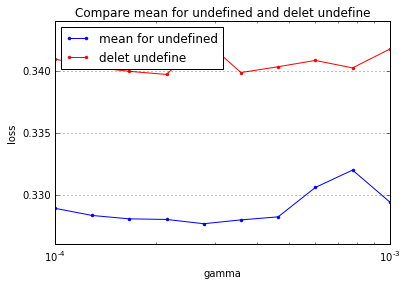

In [76]:
gammas = np.logspace(-4,-3,10)
mean_if_undef = []
del_if_undef = []
for gamma in gammas:
    
    lossU2M = compute_loss_mse(y,mean_tX, least_square_SGD(y, mean_tX,batch_size, initial_w2,max_iters, gamma))
    mean_if_undef.append(lossU2M)
    
    lossUD = compute_loss_mse(y,new_tX, least_square_SGD(y, new_tX,batch_size, initial_w1,max_iters, gamma))
    del_if_undef.append(lossUD)
undefinded_remplacement_visualization(gammas,mean_if_undef,"mean for undefined",del_if_undef,"delet undefine")

# Least square method

Method 1

In [56]:
ls_weight1, ls_mse1= least_squares(y,new_tX)
print(ls_weight1.shape)
print(ls_mse1)

(20, 1)
0.339347093912


Method 2

In [57]:
ls_weight2, ls_mse2= least_squares(y,mean_tX)
print(ls_weight2.shape)
print(ls_mse2)

(31, 1)
0.327358937889


# Ridge Regression

Define lambda parameter

In [73]:
lambda_= 0.01

Method 1

In [74]:
rr_w1, rr_mse1 = ridge_regression(y, new_tX, lambda_)
rr_w1.shape, rr_mse1

((20, 1), 0.33991486297221218)

Method 2

In [75]:
rr_w2, rr_mse2 = ridge_regression(y, mean_tX, lambda_)
rr_w2.shape, rr_mse2

((31, 1), 0.32791004500139143)

# Logistic Regression

Only for logistic regression, we change all -1 of y variable into 0, so that we can reuse all the functions we have already implemented for the course.

In [76]:
y[y==-1] = 0

### with gradient descent method

We define some parameters.

In [93]:
max_iters_gr = 1501
alpha_gr = 0.00007

We call logistic regression with gradient descent -> with true argument 

Method 1

In [103]:
# Start SGD.
start_time = datetime.datetime.now()
log_loss1,log_w1 = logistic_regression(y, new_tX, initial_w1, alpha_gr, max_iters_gr, True)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Current iteration=0, the loss=3465.735902799727
Current iteration=200, the loss=2519.935860886566
Current iteration=400, the loss=2503.971027748691
Current iteration=600, the loss=2500.5371291791503
Current iteration=800, the loss=2499.6369512030624
Current iteration=1000, the loss=2499.3769424022385
Current iteration=1200, the loss=2499.2979090108206
Current iteration=1400, the loss=2499.2731955062186
The loss=2499.268177831087
SGD: execution time=2.305 seconds


Method 2

In [98]:
# Start SGD.
start_time = datetime.datetime.now()
log_loss2,log_w2 = logistic_regression(y, mean_tX, initial_w2, alpha_gr, max_iters_gr, threshold, True)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Current iteration=0, the loss=3465.735902799727
Current iteration=200, the loss=2441.741568859311
Current iteration=400, the loss=2427.069526851878
Current iteration=600, the loss=2423.3358966891474
Current iteration=800, the loss=2422.1111050467716
Current iteration=1000, the loss=2421.6670754042498
Current iteration=1200, the loss=2421.4979986190306
Current iteration=1400, the loss=2421.431848726739
The loss=2421.4157403313693
SGD: execution time=3.813 seconds


### with newton's method

define some parameters

In [122]:
max_iters_newt = 1001
alpha_newt = 0.03

We call logistic regression with newton method --> with false argument 

method 1

In [123]:
# Start Newton method.
start_time = datetime.datetime.now()
l,w = logistic_regression(y, new_tX, initial_w1, alpha_newt, max_iters_newt, False)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Current iteration=0, the loss=3465.735902799727
Current iteration=200, the loss=2498.1164969445135
Current iteration=400, the loss=2498.102099654334
Current iteration=600, the loss=2498.102099580248
Current iteration=800, the loss=2498.102099580261
Current iteration=1000, the loss=2498.102099580381
The loss=2498.102099580381


method 2

In [124]:
# Start Newton method.
start_time = datetime.datetime.now()
l,w = logistic_regression(y, mean_tX, initial_w2, alpha_newt, max_iters_newt, False)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Current iteration=0, the loss=3465.735902799727
Current iteration=200, the loss=2420.126749375004
Current iteration=400, the loss=2420.1104725396935
Current iteration=600, the loss=2420.1104724559727
Current iteration=800, the loss=2420.110472455921
Current iteration=1000, the loss=2420.1104724558772
The loss=2420.1104724558772
SGD: execution time=2.614 seconds


# Penalized Logistic Regression
### with gradient descent

Define some parameters

In [28]:
max_iter = 1001
alpha = 0.00001
lambda_ = 0.0001
threshold = 1e-8
initial_w = np.zeros((mean_tX.shape[1], 1))

In [29]:
reg_l, reg_w = reg_logistic_regression(y, mean_tX, initial_w, lambda_, alpha, max_iter, threshold)

Current iteration=0, the loss=173286.79513998624
Current iteration=200, the loss=133631.0763195679
Current iteration=400, the loss=133436.3640461938
Current iteration=600, the loss=133406.76442975178
Current iteration=800, the loss=133395.04579226096
Current iteration=1000, the loss=133389.93836580194
The loss=133389.93836580194


# Cross Validation
## Ploting on vairious lambda

In [13]:
reshape_y=y[:,0]

In [16]:
reshape_y.shape

(250000,)

(2, 125000)
(250000, 1)
(250000, 20)
lambda = 1e-08
Current iteration=0, the loss=86643.39756999316
Current iteration=200, the loss=62381.09039234993
The loss=62381.09039234993
Current iteration=0, the loss=86643.39756999316
Current iteration=200, the loss=62525.99408549989
The loss=62525.99408549989
lambda = 3.35981828628e-08
Current iteration=0, the loss=86643.39756999316
Current iteration=200, the loss=62381.09039249199
The loss=62381.09039249199
Current iteration=0, the loss=86643.39756999316
Current iteration=200, the loss=62525.99408564288
The loss=62525.99408564288
lambda = 1.12883789168e-07
Current iteration=0, the loss=86643.39756999316
Current iteration=200, the loss=62381.090392969316
The loss=62381.090392969316
Current iteration=0, the loss=86643.39756999316
Current iteration=200, the loss=62525.994086123355
The loss=62525.994086123355
lambda = 3.79269019073e-07
Current iteration=0, the loss=86643.39756999316
Current iteration=200, the loss=62381.09039457302
The loss=62381.

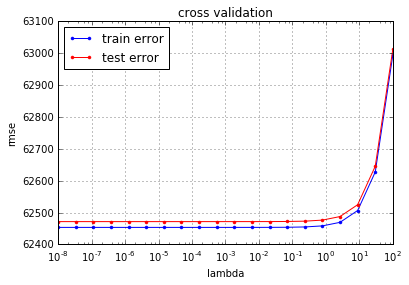

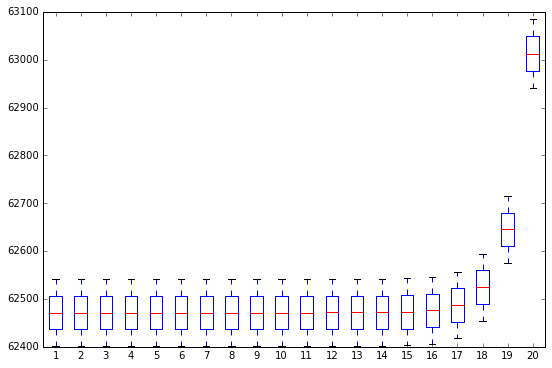

In [27]:
def cross_validation_demo(seed, initial_w, alpha, max_iter, threshold, degree,k_fold,lambdas):
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    print(k_indices.shape)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    rmse_te_var=[]

    # cross validation: TODO
    print(y.shape)
    print(new_tX.shape)
    
    for lambda_ in lambdas:
        print('lambda =',lambda_)
        loss_tr, loss_te, rmses_test = cross_validation(y, mean_tX, initial_w, alpha, max_iter, threshold, k_indices, k_fold, lambda_, degree)
        rmse_tr.append(loss_tr)
        rmse_te.append(loss_te)
        rmse_te_var.append(rmses_test)
    
    # ***************************************************    
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)
    
     # Create a figure instance
    fig = plt.figure(1, figsize=(9, 6))

    # Create an axes instance
    ax = fig.add_subplot(111)

    # Create the boxplot
    bp = ax.boxplot(rmse_te_var)

cross_validation_demo(1000, initial_w, alpha, max_iter, threshold, 1, 2, np.logspace(-8, 2, 20))

## Do your thing crazy machine learning thing here :) ...

## Generate predictions and save ouput in csv format for submission:

In [30]:
DATA_TEST_PATH = 'test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

Pour la méthode 2:

In [31]:
mean_tX_test, mean_mean, mean__std = standardize(undefToMeanMean(tX_test), mean_x=None, std_x=None)

In [35]:
OUTPUT_PATH = 'mean_log_pen_10-4.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(reg_w, mean_tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

In [32]:
np.dot(mean_tX_test, reg_w)

array([[-4.20967426],
       [-2.57229167],
       [-1.42675124],
       ..., 
       [-0.25694514],
       [-0.02774611],
       [-2.87362728]])